# Delivery Duration Prediction

DoorDash is a platform that enables customers to order food online and have it delivered to their location. Delivery time plays a vital role for both customers and businesses, as it directly impacts customer satisfaction in the food delivery sector. Ensuring prompt deliveries is essential for success in this industry.

Accurately predicting the time from when an order is placed to when it is delivered allows DoorDash to provide better information to customers and enhance their overall experience.

This data project, is aimed at predicting the total delivery duration for orders placed through DoorDash.

********************

## 1. Setup

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ddash = pd.read_csv('../input/datasets/historical_data.csv')

In [3]:
ddash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

| **Column Name**                   | **Description**                                                                                                                                                                     |
|-----------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `market_id`                           | A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id |  
| `created_at`                          | Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific) |  
| `actual_delivery_time`                | Timestamp in UTC when the order was delivered to the consumer |
| `store_id`                | an id representing the restaurant the order was submitted for |
| `store_primary_category`                | cuisine category of the restaurant, e.g., italian, asian |
| `order_protocol`                | a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol |
| `total_items`                | total number of items in the order |
| `subtotal`                | total value of the order submitted (in cents) |
| `num_distinct_items`                | number of distinct items included in the order |
| `min_item_price`                | price of the item with the least cost in the order (in cents) |
| `max_item_price`                | price of the item with the highest cost in the order (in cents) |
| `total_onshift_dashers`                | Number of available dashers who are within 10 miles of the store at the time of order creation |
| `total_busy_dashers`                | Subset of above total_onshift_dashers who are currently working on an order |
| `total_outstanding_orders`                | Number of orders within 10 miles of this order that are currently being processed. |
| `estimated_order_place_duration`                | Estimated time for the restaurant to receive the order from DoorDash (in seconds) |
| `estimated_store_to_consumer_driving_duration`                | Estimated travel time between store and consumer (in seconds) |



In [4]:
ddash.shape

(197428, 16)

In [5]:
ddash.head(10)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
7,3.0,2015-02-12 03:03:35,2015-02-12 03:36:20,5477,NaN,1.0,4,4850,4,750,1800,7.0,8.0,7.0,446,626.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
9,3.0,2015-02-18 01:15:45,2015-02-18 02:08:57,5477,NaN,1.0,2,2100,2,700,1200,2.0,2.0,2.0,446,715.0


#### Looking for anomalies / irregularities

In [6]:
ddash.duplicated().any()

False

In [7]:
ddash[['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']].describe()

,min_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders
count,197428.000000,181166.000000,181166.000000,181166.000000
mean,686.218470,44.808093,41.739747,58.050065
std,522.038648,34.526783,32.145733,52.661830
min,-86.000000,-4.000000,-5.000000,-6.000000
25%,299.000000,17.000000,15.000000,17.000000
50%,595.000000,37.000000,34.000000,41.000000
75%,949.000000,65.000000,62.000000,85.000000
max,14700.000000,171.000000,154.000000,285.000000


* total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation
* total_busy_dashers: Subset of above total_onshift_dashers who are currently working on an order
* total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.

In logical sense these columns should not have values below 0

In [8]:
ddash["total_onshift_dashers"] = ddash["total_onshift_dashers"].mask(ddash["total_onshift_dashers"] < 0, 0)
ddash["total_busy_dashers"] = ddash["total_busy_dashers"].mask(ddash["total_busy_dashers"] < 0, 0)
ddash["total_outstanding_orders"] = ddash["total_outstanding_orders"].mask(ddash["total_outstanding_orders"] < 0, 0)

price also should not be a value below 0

In [9]:
ddash.drop(ddash.loc[ddash['min_item_price'] < 0].index, inplace=True)

In [10]:
ddash.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196428.000000,197415.000000,196420.000000,197415.000000,197415.000000,197415.000000,197415.000000,197415.000000,181154.000000,181154.000000,181154.000000,197415.000000,196889.000000
mean,2.978725,3530.616827,2.882283,3.195684,2682.359770,2.670679,686.265593,1159.626310,44.809041,41.740596,58.052005,308.563969,545.360228
std,1.524861,2053.478274,1.503792,2.663965,1823.121174,1.630170,522.023500,558.402558,34.527224,32.146231,52.662393,90.141411,219.353747
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


#### Handle missing values

Because dataset is large enough, all missing values are going to be dropped to provide possibly most accurate analysis

In [11]:
ddash.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16261
total_busy_dashers                              16261
total_outstanding_orders                        16261
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [12]:
ddash.dropna(inplace=True)

In [13]:
ddash.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [14]:
ddash.shape

(175765, 16)

In [15]:
ddash.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000,175765.000000
mean,2.743749,3556.411510,2.911683,3.204318,2697.145518,2.674958,685.014297,1160.196376,44.919648,41.862265,58.232066,307.821984,546.077137
std,1.330961,2055.935115,1.513151,2.671762,1828.580708,1.625613,519.866994,560.820570,34.545175,32.169016,52.731692,89.798425,218.719108
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1703.000000,1.000000,2.000000,1412.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,251.000000,384.000000
50%,2.000000,3620.000000,3.000000,3.000000,2224.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,251.000000,544.000000
75%,4.000000,5341.000000,4.000000,4.000000,3410.000000,3.000000,942.000000,1395.000000,66.000000,63.000000,85.000000,446.000000,703.000000
max,6.000000,6987.000000,7.000000,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


#### Compute target variable

In [16]:
ddash['created_at'] = pd.to_datetime(ddash['created_at'])
ddash['actual_delivery_time'] = pd.to_datetime(ddash['actual_delivery_time'])
# total delivery duration is a subtract of actual delivery_time and created_at, converted to pd.datetime for easier operations
ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.seconds

In [17]:
ddash['actual_total_delivery_duration'].mean() / 60

47.716441745133174

In [18]:
ddash['actual_total_delivery_duration'] = (ddash['actual_delivery_time'] - ddash['created_at']).dt.total_seconds()

**********************

## 2. Exploatory Data Analysis

In this section, I will try to gain a better understanding of the dataset by asking a few questions.

******************

#### Delivery Time and Time of Day
* What are the average delivery times at different times of the day (e.g., morning, afternoon, evening)?
* Are there specific times of the day when delivery times are significantly longer?

In [19]:
# extract only specific timestamp containing hour, minute and second of taking an order
ddash['actual_delivery_time_without_date'] = ddash['actual_delivery_time'].dt.time
ddash['actual_delivery_time_without_date']

0         23:27:16
1         22:56:29
8         00:38:01
14        04:14:39
15        03:02:24
            ...   
197423    01:24:48
197424    00:58:22
197425    05:36:16
197426    19:23:22
197427    20:01:41
Name: actual_delivery_time_without_date, Length: 175765, dtype: object

In [20]:
import datetime
def check_time(time):
    '''
        Takes time as datetime object and assigns time of the day
    '''
    time_ranges = [
        (datetime.time(6, 0), datetime.time(12, 0), 'morning'),
        (datetime.time(12, 0), datetime.time(18, 0), 'afternoon'),
        (datetime.time(18, 0), datetime.time(23, 59), 'evening')
    ]
    
    for start, end, label in time_ranges:
        if start <= time <= end:
            return label
    return 'night'

In [21]:
ddash['time_of_the_day'] = ddash['actual_delivery_time_without_date'].apply(lambda x: check_time(x))
print(ddash['time_of_the_day'])

0         evening
1         evening
8           night
14          night
15          night
           ...   
197423      night
197424      night
197425      night
197426    evening
197427    evening
Name: time_of_the_day, Length: 175765, dtype: object


In [22]:
delivery_time_time_of_the_day_grouped = ddash.groupby('time_of_the_day')[['actual_total_delivery_duration', 'total_onshift_dashers']].mean()
delivery_time_time_of_the_day_grouped['actual_total_delivery_duration'] = delivery_time_time_of_the_day_grouped['actual_total_delivery_duration'] / 60
# delivery duration mean in minutes for every time of day as well as mean of total number of available dashers
delivery_time_time_of_the_day_grouped

,actual_total_delivery_duration,total_onshift_dashers
time_of_the_day,,
afternoon,45.947264,5.317895
evening,42.931025,28.920272
morning,51.350306,20.352826
night,49.895620,54.481271


Text(0, 0.5, 'Total onshift dashers (mean)')

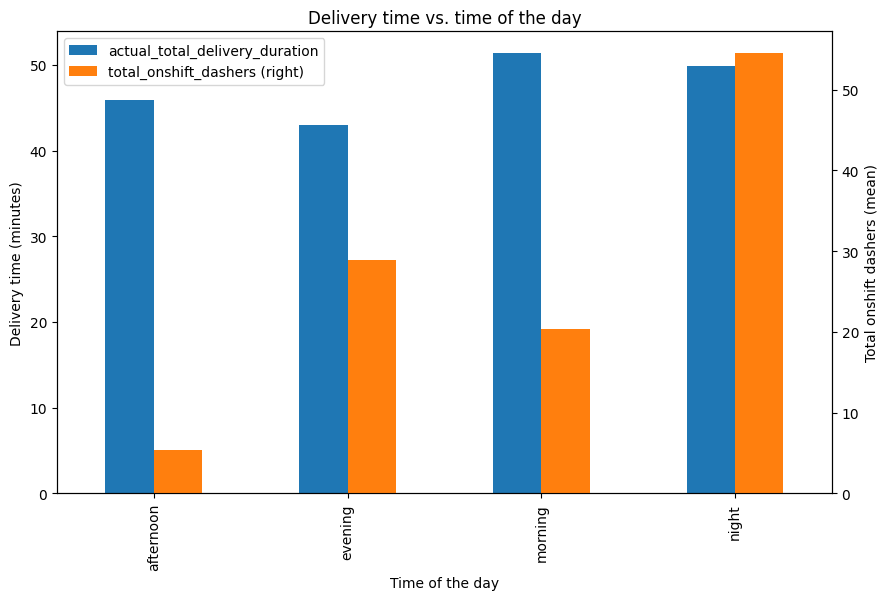

In [23]:
ax = delivery_time_time_of_the_day_grouped.plot(kind='bar',
                                          xlabel='Time of the day',
                                          title='Delivery time vs. time of the day',
                                          secondary_y='total_onshift_dashers',
                                          figsize=(10, 6))
ax.set_ylabel('Delivery time (minutes)')
ax.right_ax.set_ylabel('Total onshift dashers (mean)')

In [24]:
delivery_time_time_of_the_day_grouped = ddash.groupby('time_of_the_day')[['actual_total_delivery_duration', 'total_outstanding_orders']].mean()
delivery_time_time_of_the_day_grouped['actual_total_delivery_duration'] = delivery_time_time_of_the_day_grouped['actual_total_delivery_duration'] / 60
# delivery duration mean in minutes for every time of day as well as mean of total number of orders
delivery_time_time_of_the_day_grouped

,actual_total_delivery_duration,total_outstanding_orders
time_of_the_day,,
afternoon,45.947264,5.655640
evening,42.931025,34.196168
morning,51.350306,25.554860
night,49.895620,72.216421


Text(0, 0.5, 'Total outstanding orders (mean)')

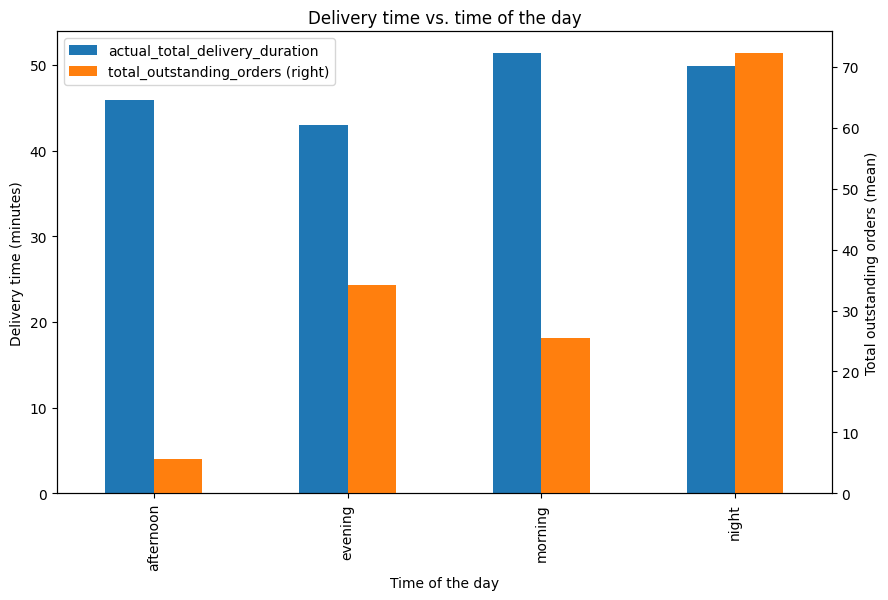

In [25]:
ax = delivery_time_time_of_the_day_grouped.plot(kind='bar',
                                          xlabel='Time of the day',
                                          title='Delivery time vs. time of the day',
                                          secondary_y='total_outstanding_orders',
                                          figsize=(10, 6))
ax.set_ylabel('Delivery time (minutes)')
ax.right_ax.set_ylabel('Total outstanding orders (mean)')

The chart shows that, on average, the longest wait times for orders occur in the morning, which may be related to heavy traffic and a low number of available couriers. On the other hand, the shortest wait times are typically in the evening.

********************

#### Impact of Location on Delivery Time
* How does delivery time vary across different cities/regions (market_id)?
* Are there specific locations with exceptionally long or short delivery times?

In [26]:
delivery_time_market_id_grouped = ddash.groupby('market_id')[['actual_total_delivery_duration', 'total_onshift_dashers', 'total_outstanding_orders']].mean() 
delivery_time_market_id_grouped['actual_total_delivery_duration'] = delivery_time_market_id_grouped['actual_total_delivery_duration'] / 60
delivery_time_market_id_grouped.sort_values(by='actual_total_delivery_duration', ascending=False, inplace=True)
# delivery duration mean in minutes for every market_id as well as mean of total number of dashers and total number of orders
delivery_time_market_id_grouped

,actual_total_delivery_duration,total_onshift_dashers,total_outstanding_orders
market_id,,,
1.0,51.510722,24.252371,30.292951
6.0,47.845820,45.277429,59.084639
3.0,47.435665,18.932520,19.752764
4.0,47.368553,60.824478,82.808403
5.0,46.560109,23.860396,26.194715
2.0,46.054291,62.551100,81.875561


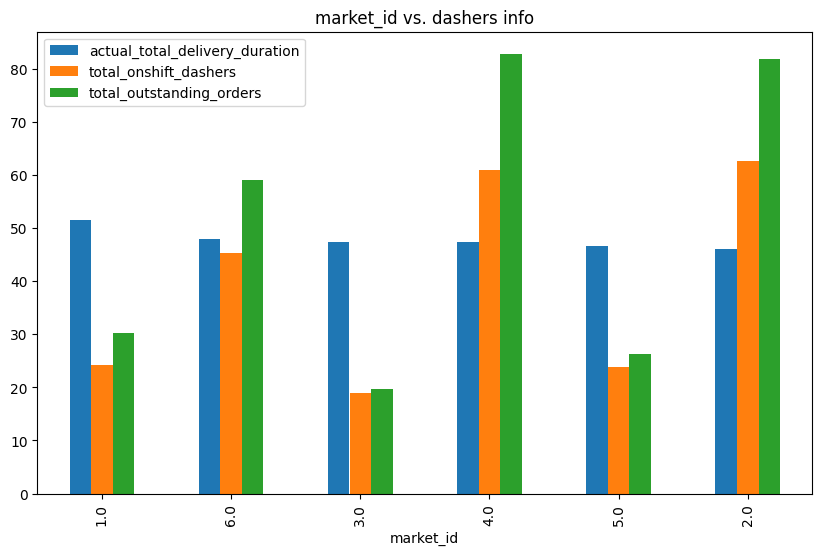

In [27]:
ax = delivery_time_market_id_grouped.plot(kind='bar',
                                          xlabel='market_id',
                                          title='market_id vs. dashers info',
                                          figsize=(10, 6))

Unfortunately, the exact locations are unknown. However, based on the charts, it can be observed that areas with the highest number of orders and the most available couriers had the lowest average delivery times.

*****************

#### Impact of Restaurant Type on Delivery Time
* What are the average delivery times for different restaurant categories (store_primary_category)?
* Do certain types of cuisine tend to have longer preparation and delivery times?

In [28]:
store_cat_delivery_time_grouped = ddash.groupby('store_primary_category')['actual_total_delivery_duration'].mean() / 60

In [29]:
# mean delivery time for every store category
store_cat_delivery_time_grouped

store_primary_category
afghan               51.784466
african              50.810000
alcohol              45.182579
alcohol-plus-food    50.766667
american             47.887616
                       ...    
thai                 49.228770
turkish              44.251818
vegan                48.577802
vegetarian           46.969029
vietnamese           45.200174
Name: actual_total_delivery_duration, Length: 73, dtype: float64

In [30]:
store_cat_delivery_time_grouped = store_cat_delivery_time_grouped.reset_index().sort_values(by='actual_total_delivery_duration', ascending=False)

In [31]:
# sorted
store_cat_delivery_time_grouped

,store_primary_category,actual_total_delivery_duration
63,southern,56.425203
17,caribbean,55.863786
9,brazilian,55.831513
8,belgian,54.991667
56,russian,54.693939
...,...,...
69,turkish,44.251818
58,sandwich,44.106376
28,fast,43.783110
41,kosher,41.576144


[]

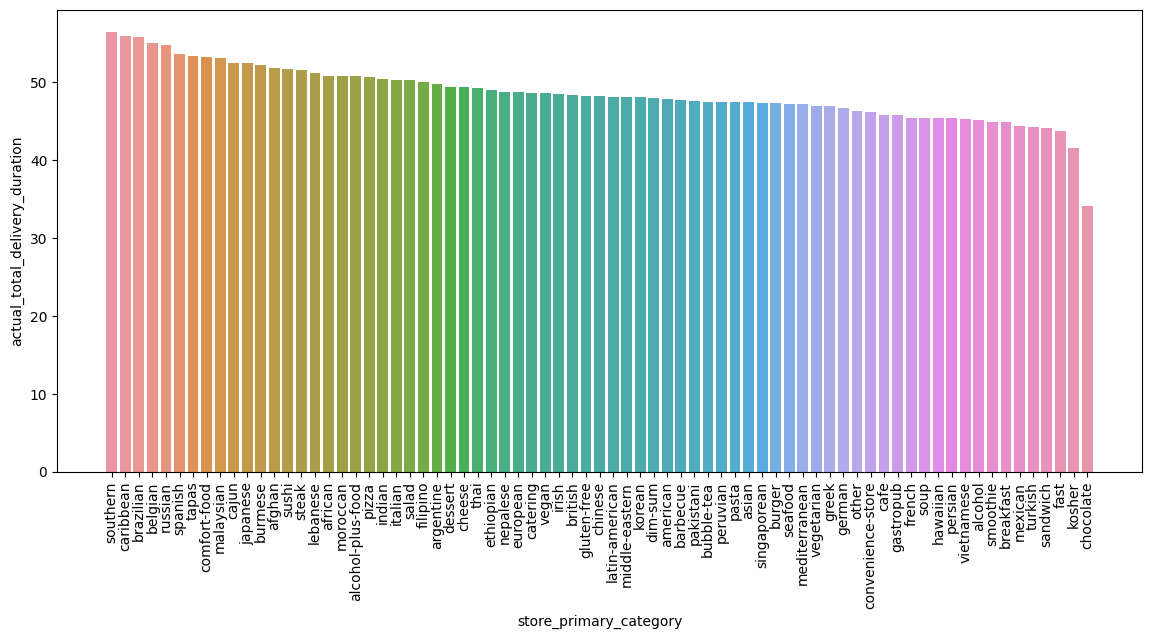

In [32]:
plt.figure(figsize=(14, 6))
sns.barplot(data=store_cat_delivery_time_grouped, x='store_primary_category', y='actual_total_delivery_duration', width=0.8)
plt.xticks(rotation=90)
plt.plot()

It is not very inuitive to drive insights from plot with 74 columns as well as take any conclusions from it, so lets reduce number of categories by mappig them to more general ones

In [33]:
# map for generalize categories
cuisine_mapping = {
    'afghan': 'middle-eastern',
    'african': 'african',
    'alcohol': 'drinks',
    'alcohol-plus-food': 'drinks',
    'american': 'american',
    'argentine': 'latin-american',
    'asian': 'asian',
    'barbecue': 'american',
    'belgian': 'european',
    'brazilian': 'latin-american',
    'breakfast': 'breakfast',
    'british': 'european',
    'bubble-tea': 'drinks',
    'burger': 'american',
    'burmese': 'asian',
    'cafe': 'cafe',
    'cajun': 'american',
    'caribbean': 'latin-american',
    'catering': 'other',
    'cheese': 'other',
    'chinese': 'asian',
    'chocolate': 'desserts',
    'comfort-food': 'american',
    'convenience-store': 'other',
    'dessert': 'desserts',
    'dim-sum': 'asian',
    'ethiopian': 'african',
    'european': 'european',
    'fast': 'american',
    'filipino': 'asian',
    'french': 'european',
    'gastropub': 'american',
    'german': 'european',
    'gluten-free': 'special',
    'greek': 'european',
    'hawaiian': 'american',
    'indian': 'asian',
    'indonesian': 'asian',
    'irish': 'european',
    'italian': 'european',
    'japanese': 'asian',
    'korean': 'asian',
    'kosher': 'special',
    'latin-american': 'latin-american',
    'lebanese': 'middle-eastern',
    'malaysian': 'asian',
    'mediterranean': 'mediterranean',
    'mexican': 'latin-american',
    'middle-eastern': 'middle-eastern',
    'moroccan': 'african',
    'nepalese': 'asian',
    'other': 'other',
    'pakistani': 'asian',
    'pasta': 'european',
    'persian': 'middle-eastern',
    'peruvian': 'latin-american',
    'pizza': 'european',
    'russian': 'european',
    'salad': 'special',
    'sandwich': 'american',
    'seafood': 'seafood',
    'singaporean': 'asian',
    'smoothie': 'drinks',
    'soup': 'other',
    'southern': 'american',
    'spanish': 'european',
    'steak': 'american',
    'sushi': 'asian',
    'tapas': 'european',
    'thai': 'asian',
    'turkish': 'european',
    'vegan': 'special',
    'vegetarian': 'special',
    'vietnamese': 'asian'
}

ddash['general_cuisine_category'] = ddash['store_primary_category'].map(cuisine_mapping)

In [34]:
# mean by generalized categories
store_cat_delivery_time_grouped = ddash.groupby('general_cuisine_category')['actual_total_delivery_duration'].mean() / 60
store_cat_delivery_time_grouped = store_cat_delivery_time_grouped.reset_index().sort_values(by='actual_total_delivery_duration', ascending=False)
store_cat_delivery_time_grouped

,general_cuisine_category,actual_total_delivery_duration
7,european,49.932565
13,special,49.521244
5,desserts,49.407478
0,african,49.365278
2,asian,49.291886
10,middle-eastern,47.575945
12,seafood,47.247979
9,mediterranean,47.183093
11,other,46.893066
1,american,46.555781


[]

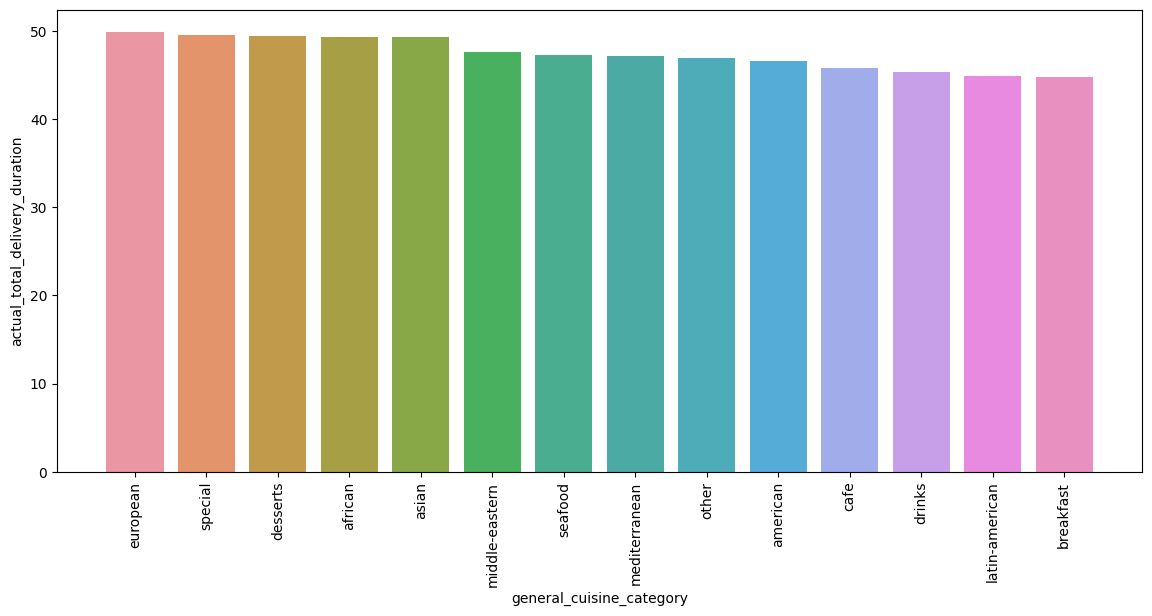

In [35]:
plt.figure(figsize=(14, 6))
sns.barplot(data=store_cat_delivery_time_grouped, x='general_cuisine_category', y='actual_total_delivery_duration', width=0.8)
plt.xticks(rotation=90)
plt.plot()

Alright, from the chart after grouping, it shows that the longest waiting times are for orders from European categories, while the shortest waiting times are for orders from the breakfast category. From the chart above, it appears that the longest waiting times are for orders from the southern category, while the shortest waiting times are for orders from the chocolate category.

****************

#### Number of Items in an Order and Delivery Time
* Is there a correlation between the number of items in an order (total_items, num_distinct_items) and delivery time?
* Do larger orders tend to have longer delivery times?

<Axes: xlabel='actual_total_delivery_duration', ylabel='total_items'>

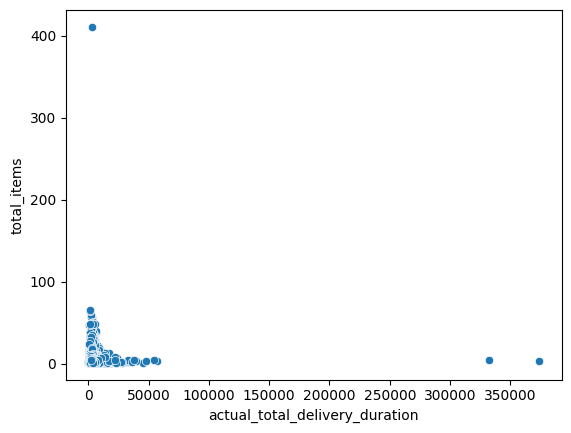

In [36]:
sns.scatterplot(data=ddash, x='actual_total_delivery_duration', y='total_items')

As can be seen, this comparison shows two significant outliers in the dataset, which should be addressed. Additionally, the column for actual total delivery duration will be truncated to times no longer than 2 hours, i.e., 7200 seconds. This will help the model better align with the data.

In [37]:
# cut off to max 2 hour delivery duration 
ddash.drop(ddash.loc[ddash['actual_total_delivery_duration'] >= 7200].index,inplace=True)
ddash['actual_total_delivery_duration'].max()

7196.0

Also deleting outlier in `total_items` of above 50 in one order

In [38]:
ddash.drop(ddash.loc[ddash['total_items'] > 50].index, inplace=True)
ddash['total_items'].max()

49

In [39]:
ddash.shape

(174785, 20)

<Axes: xlabel='actual_total_delivery_duration', ylabel='total_items'>

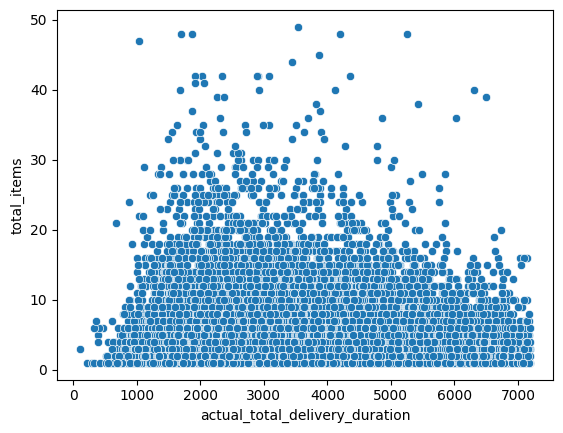

In [40]:
sns.scatterplot(data=ddash, x='actual_total_delivery_duration', y='total_items')

In [41]:
ddash['total_items'].corr(ddash['actual_total_delivery_duration'])

0.1338319070392855

A value of 0.13 suggests an almost zero linear relationship between the number of items in an order and delivery time. In other words, changing the number of items in an order has almost no effect on changing the actual delivery time.

******************

#### Impact of Workload on Delivery Time
* How does the number of available delivery drivers (total_onshift_dashers, total_busy_dashers) affect delivery time?
* Does a higher number of active orders (total_outstanding_orders) lead to longer delivery times?

<Axes: xlabel='total_onshift_dashers', ylabel='actual_total_delivery_duration'>

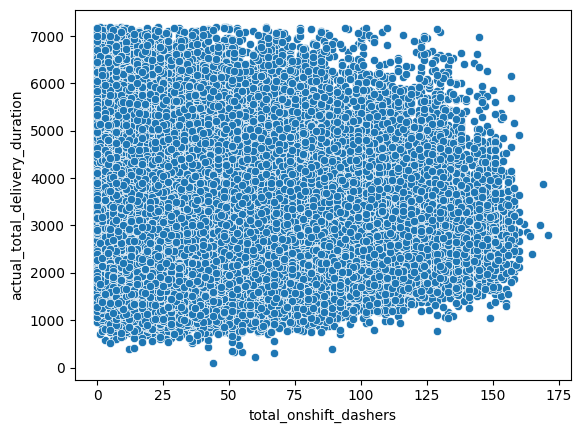

In [42]:
sns.scatterplot(data=ddash, x='total_onshift_dashers', y='actual_total_delivery_duration')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_outstanding_orders', ylabel='total_onshift_dashers'>

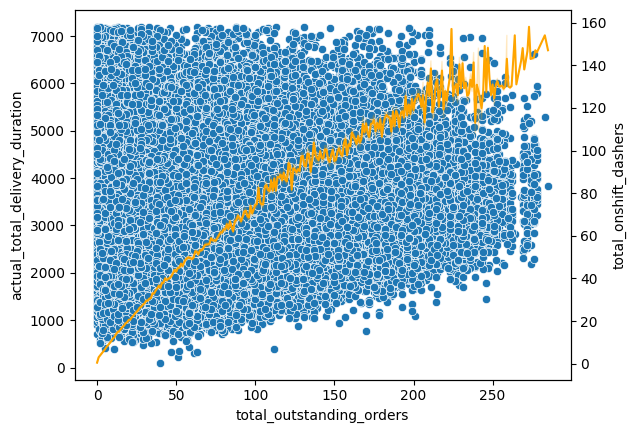

In [43]:
ax1 = plt.subplot()
ax2 = ax1.twinx()
sns.scatterplot(data=ddash, x='total_outstanding_orders', y='actual_total_delivery_duration', ax=ax1)
sns.lineplot(data=ddash, x='total_outstanding_orders', y='total_onshift_dashers', ax=ax2, color='orange')

The charts suggest that the more pending orders there are, the longer the delivery time will be. However, considering the number of available couriers – as the number of orders increases, the number of couriers also rises, bringing the delivery time closer to the average.

In [44]:
heatmap_df = ddash[['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']]

correlations = heatmap_df.corrwith(ddash['actual_total_delivery_duration'])

correlations

total_onshift_dashers       0.087262
total_busy_dashers          0.108426
total_outstanding_orders    0.201686
dtype: float64

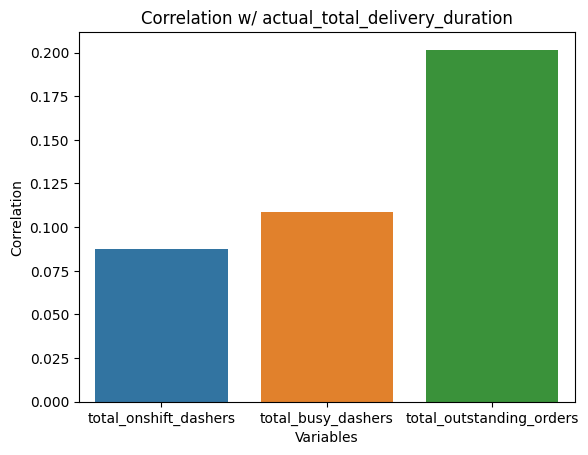

In [45]:
correlations = heatmap_df.corrwith(ddash['actual_total_delivery_duration'])

sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Correlation w/ actual_total_delivery_duration')
plt.ylabel('Correlation')
plt.xlabel('Variables')
plt.show()

Considering the three factors determining courier availability, the one most correlated with delivery time is `total_outstanding_orders`

Here is also a pairplor making these relations more clear

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

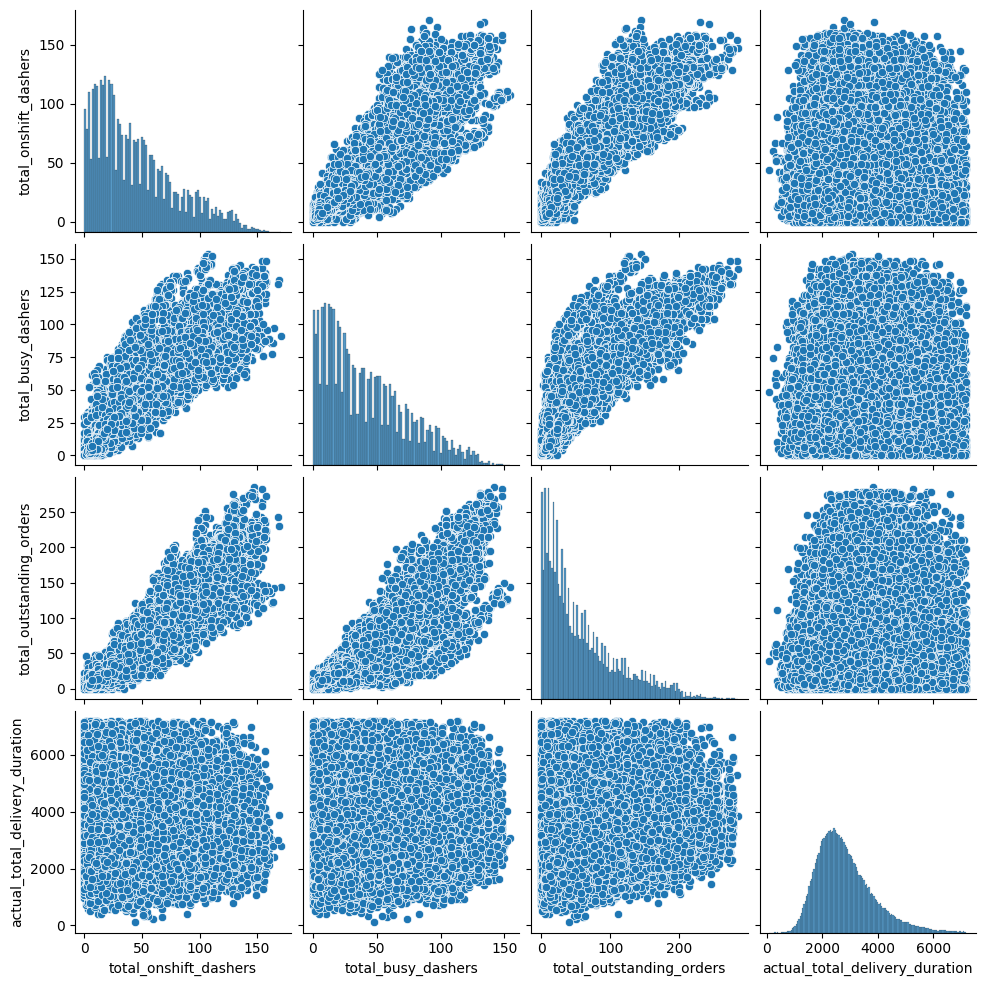

In [46]:
sns.pairplot(ddash, vars=['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'actual_total_delivery_duration'])

*************

#### Peak Time Analysis
* Which days of the week or hours of the day have the highest order volumes, leading to longer delivery times?
* Are there any seasonal patterns in delivery times?

In [47]:
sorted(ddash['created_at'].dt.hour.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [48]:
ddash['hour_created'] = ddash['actual_delivery_time'].dt.hour
sorted(ddash['hour_created'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22, 23]

**Important!** The dataset does not contain orders from 9 AM to 2 PM

In [49]:
peak_hour_delivery_time_mean = ddash.groupby('hour_created')['actual_total_delivery_duration'].mean()
peak_hour_delivery_time_mean = peak_hour_delivery_time_mean.reset_index().sort_values(by='hour_created')
peak_hour_delivery_time_mean

,hour_created,actual_total_delivery_duration
0,0,2515.454463
1,1,2516.797865
2,2,2852.364332
3,3,3199.245185
4,4,3196.212571
5,5,2892.861331
6,6,2794.872249
7,7,3125.795134
8,8,4995.533333
9,15,2513.347826


<Axes: xlabel='hour_created', ylabel='actual_total_delivery_duration'>

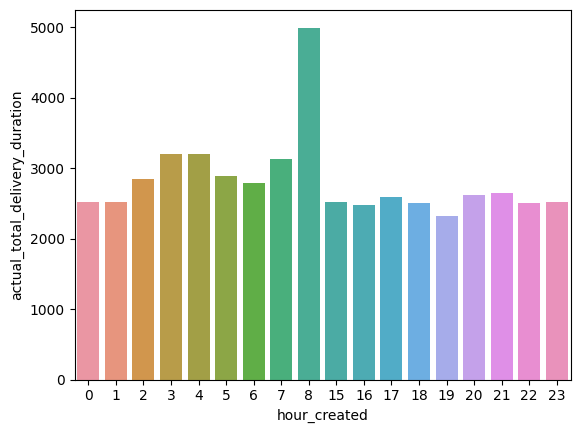

In [50]:
sns.barplot(data=peak_hour_delivery_time_mean, x='hour_created', y='actual_total_delivery_duration')

So, the longest average delivery time occurs at 8 AM, likely because everyone is commuting to work/school causing traffic or, as shown earlier, there are fewer available couriers in the morning.

************

## 3. Feature creation

The previous charts showed that the number of occupied and available couriers can have a significant impact on delivery time predictions. Therefore, a new feature will be created, representing the ratio of occupied couriers to all available couriers.

In [51]:
ddash['busy_dashers_ratio'] = ddash['total_busy_dashers'] / ddash['total_onshift_dashers']
ddash['busy_dashers_ratio'] 

0         0.424242
1         2.000000
8         0.750000
14        1.200000
15        1.000000
            ...   
197423    1.000000
197424    0.916667
197425    1.051282
197426    1.000000
197427    1.000000
Name: busy_dashers_ratio, Length: 174785, dtype: float64

In [52]:
ddash['busy_dashers_ratio'].describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.713420e+05
mean              inf
std               NaN
min      0.000000e+00
25%      8.275862e-01
50%      9.622642e-01
75%      1.000000e+00
max               inf
Name: busy_dashers_ratio, dtype: float64

In [53]:
np.where(np.any(~np.isfinite(ddash['busy_dashers_ratio']), axis=0) == True)

<ipython-input-53-008c94b23fd4>:1: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  np.where(np.any(~np.isfinite(ddash['busy_dashers_ratio']), axis=0) == True)


(array([0]),)

In [54]:
ddash.replace([np.inf, -np.inf], np.nan, inplace=True)
ddash.dropna(inplace=True)

In [55]:
ddash['busy_dashers_ratio'].describe()

count    171290.000000
mean          0.950731
std           0.398169
min           0.000000
25%           0.827586
50%           0.962264
75%           1.000000
max          31.000000
Name: busy_dashers_ratio, dtype: float64

***************

## 4. Data Preparing

Encoding categorical variables

In [56]:
market_id_dummies = pd.get_dummies(ddash.market_id, dtype='int')
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head(5)

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
8,0,1,0,0,0,0
14,1,0,0,0,0,0
15,1,0,0,0,0,0


In [57]:
ddash['store_id'].value_counts()

store_id
6865    922
1311    848
314     804
1686    754
3937    706
       ... 
2241      1
2703      1
4726      1
5604      1
1845      1
Name: count, Length: 5464, dtype: int64

In [58]:
store_primary_category_dummies = pd.get_dummies(ddash['store_primary_category'], dtype='int')
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head(5)

,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
store_general_category_dummies = pd.get_dummies(ddash['general_cuisine_category'], dtype='int')
store_general_category_dummies = store_general_category_dummies.add_prefix('category_')
store_general_category_dummies.head(5)

,category_african,category_american,category_asian,category_breakfast,category_cafe,category_desserts,category_drinks,category_european,category_latin-american,category_mediterranean,category_middle-eastern,category_other,category_seafood,category_special
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [60]:
time_of_the_day_dummies = pd.get_dummies(ddash['time_of_the_day'], dtype='int')
time_of_the_day_dummies = time_of_the_day_dummies.add_prefix('time_of_the_')
time_of_the_day_dummies.head(5)

,time_of_the_afternoon,time_of_the_evening,time_of_the_morning,time_of_the_night
0,0,1,0,0
1,0,1,0,0
8,0,0,0,1
14,0,0,0,1
15,0,0,0,1


In [61]:
order_protocol_dummies = pd.get_dummies(ddash['order_protocol'], dtype='int')
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head(5)

,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
8,0,0,1,0,0,0,0
14,1,0,0,0,0,0,0
15,1,0,0,0,0,0,0


In [62]:
# deleting columns to leave space for dummies
train_df = ddash.drop(
    columns=['order_protocol', 'created_at', 'market_id', 'store_id', 'store_primary_category', 'actual_delivery_time', 'general_cuisine_category', 'time_of_the_day', 'hour_created', 'actual_delivery_time_without_date']
)


print(train_df.shape)
train_df.head()

(171290, 12)


,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000


In [63]:
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_total_delivery_duration,busy_dashers_ratio
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,0.424242
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,2.000000
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0,0.750000
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0,1.200000
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,3907.0,1.000000
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,3383.0,0.916667
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,3008.0,1.051282
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,3907.0,1.000000


In [64]:
train_df = pd.concat([train_df, time_of_the_day_dummies, market_id_dummies, order_protocol_dummies, store_primary_category_dummies], axis=1)

In [65]:
train_df

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,...,0,0,0,0,0,0,0,0,0,0
8,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,...,0,0,0,0,0,0,0,0,0,0
14,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,...,0,0,0,0,0,0,0,0,0,0
15,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3,1389,3,345,649,17.0,17.0,23.0,251,331.0,...,0,0,0,0,0,0,0,0,0,0
197424,6,3010,4,405,825,12.0,11.0,14.0,251,915.0,...,0,0,0,0,0,0,0,0,0,0
197425,5,1836,3,300,399,39.0,41.0,40.0,251,795.0,...,0,0,0,0,0,0,0,0,0,0
197426,1,1175,1,535,535,7.0,7.0,12.0,446,384.0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
train_df = train_df.astype('float32')
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,446.0,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,446.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,...,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000,171290.000000
mean,3.195102,2697.858887,2.671271,686.049377,1161.843872,45.886574,42.755695,59.415302,307.244324,545.629395,...,0.000204,0.000117,0.005972,0.011139,0.000695,0.035805,0.001279,0.001319,0.004390,0.031794
std,2.462726,1826.078979,1.620795,519.678406,560.257202,34.288784,31.932430,52.577171,89.558151,218.395126,...,0.014293,0.010805,0.077050,0.104952,0.026349,0.185804,0.035734,0.036300,0.066113,0.175452
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1418.000000,1.000000,299.000000,799.000000,18.000000,16.000000,18.000000,251.000000,383.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2225.000000,2.000000,595.000000,1095.000000,38.000000,36.000000,42.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3413.000000,3.000000,945.000000,1395.000000,66.000000,63.000000,86.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,1739.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
train_df.shape

(171290, 102)

Added more features to boost model source of prediciton

In [69]:
train_df['percent_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']

In [70]:
train_df.shape

(171290, 105)

### Apply random forest for feature selection

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [72]:
X = train_df.drop(columns='actual_total_delivery_duration')
y = train_df['actual_total_delivery_duration']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [73]:
X

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese,percent_distinct_item_of_total,avg_price_per_item,price_range_of_items
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,860.250000,682.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1900.000000,0.0
8,4.0,4771.0,3.0,820.0,1604.0,8.0,6.0,18.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,1192.750000,784.0
14,1.0,1525.0,1.0,1525.0,1525.0,5.0,6.0,8.0,446.0,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1525.000000,0.0
15,2.0,3620.0,2.0,1425.0,2195.0,5.0,5.0,7.0,446.0,205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1810.000000,770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,3.0,1389.0,3.0,345.0,649.0,17.0,17.0,23.0,251.0,331.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,463.000000,304.0
197424,6.0,3010.0,4.0,405.0,825.0,12.0,11.0,14.0,251.0,915.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,501.666656,420.0
197425,5.0,1836.0,3.0,300.0,399.0,39.0,41.0,40.0,251.0,795.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,367.200012,99.0
197426,1.0,1175.0,1.0,535.0,535.0,7.0,7.0,12.0,446.0,384.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1175.000000,0.0


In [74]:
feature_names = [f'feature {i}' for i in range((X.shape[1]))]
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
feats = {}
for feature, importance in zip(X.columns, rfr.feature_importances_):
    feats[feature] = importance

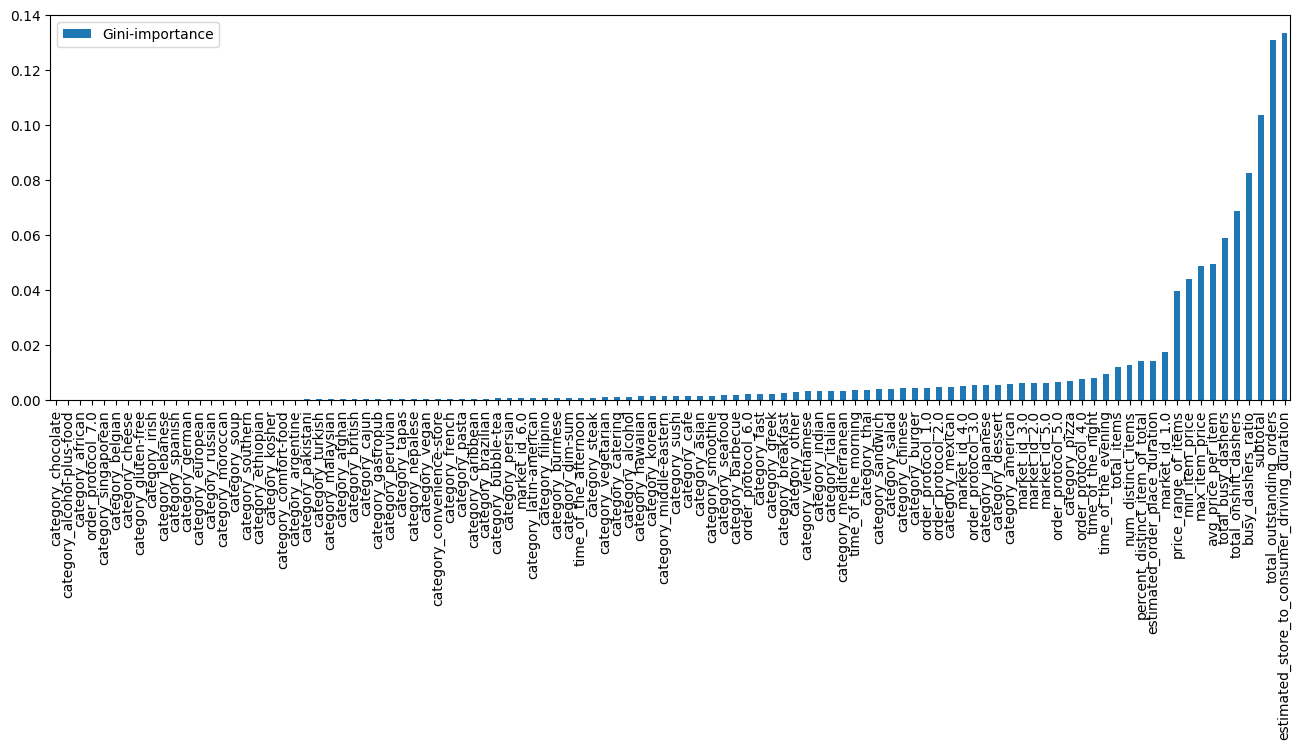

In [75]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(16,5))
plt.show()

Thanks to the Random Forest Regressor model and the Gini importance score, the most significant features for regression modeling were identified. This will aid in training, as the model will be trained on several feature sets based on this score: the top 10, 20, 40, and the full dataset.

**************

## 5. Modeling

A functions has been prepared to scale and train the regression model to streamline the entire process and encapsulate it in one operation.

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [77]:
def scale(scaler, X, y):
    X_scaler = scaler
    X_scaler.fit(X=X, y=y)
    X_scaled = X_scaler.transform(X)
    y_scaler = scaler
    y_scaler.fit(y.values.reshape(-1, 1))
    y_scaled = y_scaler.transform(y.values.reshape(-1, 1))

    return X_scaled, y_scaled, X_scaler, y_scaler

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
def metrics_scaler(scaler, y_test, y_pred_scaled, model_name):
    y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    rmse_error = mean_squared_error(y_test, y_predict[:, 0], squared=False)
    r2 = r2_score(y_test, y_predict[:, 0])
    print(f'Error = {rmse_error} in {model_name}')
    print(f'R2 = {r2} in {model_name}')
    print('---------------------------------\n')
    
    return rmse_error, r2, y_predict

In [79]:
def metrics(y_test, y_pred, model_name):
    y_predict = y_pred
    rmse_error = mean_squared_error(y_test, y_predict, squared=False)
    r2 = r2_score(y_test, y_predict)
    print(f'Error = {rmse_error} in {model_name}')
    print(f'R2 = {r2} in {model_name}')
    print('---------------------------------\n')
    
    return rmse_error, r2

In [80]:
from sklearn import tree, neighbors, linear_model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [81]:
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    # Fitting data
    model.fit(X_train, y_train)

    # Calculating train error
    y_predict = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_predict, squared=False)

    # Calculatin test error
    y_predict = model.predict(X_test)
    test_error = mean_squared_error(y_test, y_predict, squared=False)

    # Printing results
    if verbose:
        print(f"Train error = {train_error} in {model_name}")
        print(f"Test error = {test_error} in {model_name}")

    # Saving model
    trained_model = model

    return trained_model, y_predict, train_error, test_error

In [82]:
pred_dict = {
    'regression_model': [],
    'feature_set': [],
    'scaler_name': [],
    'RMSE': [],
    'R2': [],
}

regression_models = {
    'Linear': linear_model.LinearRegression(),
    'Ridge': linear_model.Ridge(),
    'DecisionTree': tree.DecisionTreeRegressor(max_depth=6),
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LGBM': LGBMRegressor(),
}

feature_sets = {
    'full_dataset': X.columns.to_list(),
    'features_40': importances.sort_values(by='Gini-importance')[-40:].index.tolist(),
    'features_20': importances.sort_values(by='Gini-importance')[-20:].index.tolist(),
    'features_10': importances.sort_values(by='Gini-importance')[-10:].index.tolist(),
}

scalers = {
    'Standard scaler': StandardScaler(),
    'NotScale': None,
}

for feature_set_name in feature_sets.keys():
    
    feature_set = feature_sets[feature_set_name]
    
    for scaler_name in scalers.keys():
        print(f"------scaled with {scaler_name}-------- included columns are {feature_set_name}")
        print("")
        
        for model_name in regression_models.keys():
            if scaler_name == 'NotScale':
                X = train_df[feature_set]
                y = train_df['actual_total_delivery_duration']
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                _, y_predict, _, _ = make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose=True)
                rmse_error, r2 = metrics(y_test, y_predict, model_name)       
                
            else:              
                X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
                X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
                    X_scaled, y_scaled, test_size=0.2, random_state=42)
                _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:, 0], X_test_scaled, y_test_scaled[:, 0], regression_models[model_name], model_name, verbose=True)
                rmse_error, r2, y_predict = metrics_scaler(y_scaler, y_test, y_predict_scaled, model_name)

            pred_dict['regression_model'].append(model_name)
            pred_dict['feature_set'].append(feature_set_name)
            pred_dict['scaler_name'].append(scaler_name)
            pred_dict['RMSE'].append(rmse_error)
            pred_dict['R2'].append(r2)

------scaled with Standard scaler-------- included columns are full_dataset

Train error = 0.8442094922065735 in Linear
Test error = 0.8431301116943359 in Linear
Error = 850.5986328125 in Linear
R2 = 0.28576509387748783 in Linear
---------------------------------

Train error = 0.8442035913467407 in Ridge
Test error = 0.8431698679924011 in Ridge
Error = 850.6387329101562 in Ridge
R2 = 0.2856977399250866 in Ridge
---------------------------------

Train error = 0.8974972240264895 in DecisionTree
Test error = 0.8997884722152549 in DecisionTree
Error = 907.7588690819567 in DecisionTree
R2 = 0.1865465251212579 in DecisionTree
---------------------------------

Train error = 0.30830743023390444 in RandomForest
Test error = 0.8200982489505036 in RandomForest
Error = 827.3627433613324 in RandomForest
R2 = 0.3242537597547097 in RandomForest
---------------------------------

Train error = 0.7499570846557617 in XGBoost
Test error = 0.8024870157241821 in XGBoost
Error = 809.5955200195312 in XGBo

In [83]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE,R2
0,Linear,full_dataset,Standard scaler,850.598633,0.285765
1,Ridge,full_dataset,Standard scaler,850.638733,0.285698
2,DecisionTree,full_dataset,Standard scaler,907.758869,0.186547
3,RandomForest,full_dataset,Standard scaler,827.362743,0.324254
4,XGBoost,full_dataset,Standard scaler,809.595520,0.352965
5,LGBM,full_dataset,Standard scaler,809.623951,0.352919
6,Linear,full_dataset,NotScale,850.650024,0.285679
7,Ridge,full_dataset,NotScale,850.629761,0.285713
8,DecisionTree,full_dataset,NotScale,907.758869,0.186547
9,RandomForest,full_dataset,NotScale,827.683989,0.323729


In [84]:
pred_df.groupby(['regression_model'])['RMSE'].min()

regression_model
DecisionTree    907.758869
LGBM            809.623951
Linear          850.598633
RandomForest    827.362743
Ridge           850.629761
XGBoost         809.595520
Name: RMSE, dtype: float64

In [85]:
pred_df.sort_values(by='RMSE')

,regression_model,feature_set,scaler_name,RMSE,R2
10,XGBoost,full_dataset,NotScale,809.595520,0.352965
4,XGBoost,full_dataset,Standard scaler,809.595520,0.352965
5,LGBM,full_dataset,Standard scaler,809.623951,0.352919
11,LGBM,full_dataset,NotScale,809.826983,0.352595
22,XGBoost,features_40,NotScale,810.971619,0.350763
16,XGBoost,features_40,Standard scaler,810.971619,0.350763
17,LGBM,features_40,Standard scaler,810.997634,0.350722
23,LGBM,features_40,NotScale,811.097923,0.350561
35,LGBM,features_20,NotScale,819.188908,0.337540
29,LGBM,features_20,Standard scaler,819.649041,0.336795


In [86]:
pred_df.groupby(['regression_model', 'feature_set'])[['RMSE', 'R2']].mean().sort_values(by='RMSE',ascending=True)

RMSE        R2
regression_model feature_set                       
XGBoost          full_dataset  809.595520  0.352965
LGBM             full_dataset  809.725467  0.352757
XGBoost          features_40   810.971619  0.350763
LGBM             features_40   811.047779  0.350641
                 features_20   819.418975  0.337168
XGBoost          features_20   823.085022  0.331223
RandomForest     full_dataset  827.523366  0.323991
                 features_40   829.047532  0.321499
                 features_20   839.592352  0.304129
LGBM             features_10   843.201114  0.298134
XGBoost          features_10   847.259216  0.291362
Linear           full_dataset  850.624329  0.285722
Ridge            full_dataset  850.634247  0.285705
                 features_40   851.900238  0.283578
Linear           features_40   851.903473  0.283572
Ridge            features_20   855.577362  0.277379
Linear           features_20   855.577393  0.277379
RandomForest     features_10   861.799360  0.266831
Ridge            features_10   878.267334  0.238543
Linear           features_10   878.279053  0.238523
DecisionTree     full_dataset  907.758869  0.186547
                 features_40   907.758869  0.186547
                 features_20   907.758869  0.186547
                 features_10   909.571023  0.183295

In [87]:
y.nsmallest(int(len(y)*0.05)).mean() / 60

21.337744140625

In [88]:
y.nlargest(int(len(y)*0.05)).mean() / 60

91.1746826171875

In [89]:
y.mean() / 60

46.9633544921875